In [18]:
import pandas as pd
from io import StringIO
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [19]:
# CSV data inside code
csv_data = """x1,x2,label
0.0,0.0,0
0.0,1.0,1
1.0,0.0,1
1.0,1.0,0
0.2,0.8,1
0.8,0.2,1
0.9,0.9,0
0.1,0.1,0
0.3,0.7,1
0.7,0.3,1
0.85,0.85,0
0.15,0.15,0
"""

# read CSV from string
data = pd.read_csv(StringIO(csv_data))

In [20]:
data

,x1,x2,label
0,0.00,0.00,0
1,0.00,1.00,1
2,1.00,0.00,1
3,1.00,1.00,0
4,0.20,0.80,1
5,0.80,0.20,1
6,0.90,0.90,0
7,0.10,0.10,0
8,0.30,0.70,1
9,0.70,0.30,1


In [21]:
X = data[['x1', 'x2']]
y = data['label']

In [22]:
X

,x1,x2
0,0.00,0.00
1,0.00,1.00
2,1.00,0.00
3,1.00,1.00
4,0.20,0.80
5,0.80,0.20
6,0.90,0.90
7,0.10,0.10
8,0.30,0.70
9,0.70,0.30


In [23]:
y

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    0
Name: label, dtype: int64

In [24]:
# SVM with non-linear kernel
model = SVC(kernel='rbf')
model.fit(X, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


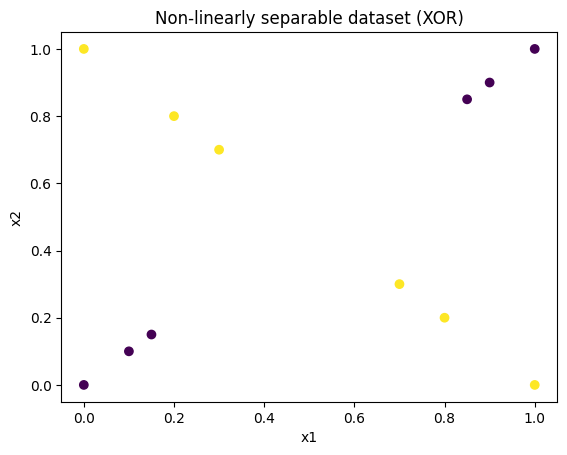

In [25]:
plt.scatter(data['x1'], data['x2'], c=data['label'])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Non-linearly separable dataset (XOR)")
plt.show()

C:\Users\AYUSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


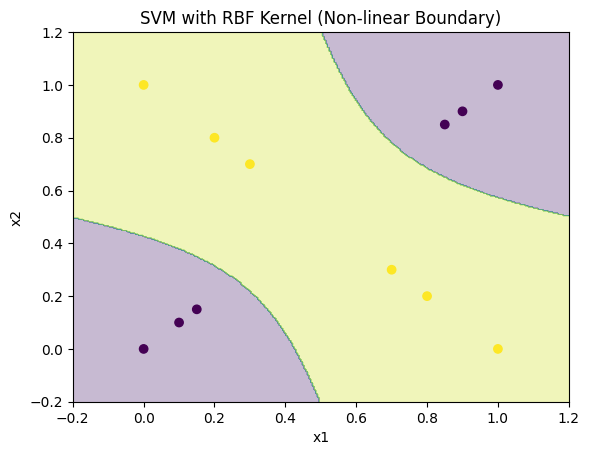

In [26]:
import numpy as np
from sklearn.svm import SVC

X = data[['x1', 'x2']]
y = data['label']

# train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='auto')
model.fit(X, y)

# create mesh grid
x_min, x_max = X['x1'].min() - 0.2, X['x1'].max() + 0.2
y_min, y_max = X['x2'].min() - 0.2, X['x2'].max() + 0.2

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# predict on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['x1'], X['x2'], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM with RBF Kernel (Non-linear Boundary)")
plt.show()
